<a href="https://colab.research.google.com/github/viviviannnnn/python/blob/main/pandas%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

#一欄一欄
data1 = {
    'name':['Gill','Vivian','Danny'],
    'age':[50,26,23],
    'sex':['W','W','M']
}
df = pd.DataFrame(data1)
df

#一列一列
data2 = [
    ['Gill',50,'W'],
    ['Vivian',26,'W'],
    ['Danny',25,'M']
]
df2 = pd.DataFrame(data2,columns=['name','age','sex'])
df2

,name,age,sex
0,Gill,50,W
1,Vivian,26,W
2,Danny,25,M


In [23]:
import pandas as pd
df = pd.read_csv('Ex1.csv')
df.T                #轉置
df.shape
df.size
df.index
df.columns
df.dtypes
df.empty            #檢查是否為空表格0x0的表格

df['level'].hasnans #告知是否有NaN無效或缺失
df['sex'].is_unique #此欄位的值是不是不重複
df['sex'].unique()  #取集合,有哪些獨立的類別

df.tail(3)          #最後三筆資料
df.nlargest(5,'pay') #將資料由某欄位由大排到小

,name,age,sex,pay,email,level
13,Emma,22,F,70000,Emma@hotmail.com,M
10,Jason,30,M,50000,Jason@microsoft.com,NaN
9,Leonard,28,M,45000,Leonard@hotmail.com,H
4,Mark,18,M,41500,Mark@hotmail.com,NaN
12,Taylor,25,F,38000,Taylor@microsoft.com,NaN


In [22]:
import pandas as pd
df = pd.read_csv('Ex1.csv')

#讀取一格
df.at[4,'pay'] #法一
df.iat[4,3]    #法二

#讀取一列
df.loc[4]   #Series
df.iloc[4]  #Series#標籤為非整數時使用
df.loc[[4]] #DataFrame
df.iloc[[4]]#DataFrame

#讀取一欄
df['pay']
df.pay
df.loc[:,'pay'] #loc一定要指定列,寫在左邊
df.iloc[:,3] #i是index指數的意思,所以寫數字
df[['pay']] #DataFrame
df.loc[:,['pay']] #再加括號變DataFrame
df.iloc[:,[3]] #DataFrame

#取代
df.at[2,'pay'] = 18000 #一格
df.loc[2] = ['Amy',19,'F',26000,'Amy@yahoo.com.tw','M']

#新增
df['pay_2'] = df['pay']*1.05

#讀取多列
df.loc[[2,4,6]] #一定要雙層
df.loc[2:6] #出現2~6列 #使用slice不需雙層
df.iloc[2:6] #出現2~5列

#讀取多欄
df[['name','pay','pay_2']]
df.loc[:,'name':'pay'] #冒號是指列全都要
df.iloc[:,:4]

,name,age,sex,pay
0,Tom,15,M,30000
1,Mary,21,F,20000
2,Amy,19,F,26000
3,Tony,16,M,22000
4,Mark,18,M,41500
5,Steve,15,M,19500
6,Bruce,17,M,28550
7,Alice,25,F,17680
8,Carol,22,F,26840
9,Leonard,28,M,45000


In [21]:
import pandas as pd
df = pd.read_csv('Ex1.csv')

# 1 df.loc[[1,2,4,5],['name','pay']]

# 2 df.loc[8:10,'name':'sex']
# df.iloc[8:11,0:3]

# 3 mask1 = df['pay'] > 25000 #遮罩
# mask2 = df['age'] >= 20
# df[mask1 & mask2] #且
# df[mask1 | mask2] #或
# df[~mask1]        #非
# df.loc[mask1]

# 4 標記資料
mask = df['pay'] >= 25000
df.loc[mask,'p%'] = 1.01
df.loc[~mask,'p%'] = 1.05
df

,name,age,sex,pay,email,level,p%
0,Tom,15,M,30000,Tom@gmail.com,H,1.01
1,Mary,21,F,20000,Mary@hotmail.com,M,1.05
2,Amy,19,F,15000,Amy@gmail.com,M,1.05
3,Tony,16,M,22000,Tony@yahoo.com,NaN,1.05
4,Mark,18,M,41500,Mark@hotmail.com,NaN,1.01
5,Steve,15,M,19500,Steve@gmail.com,NaN,1.05
6,Bruce,17,M,28550,Bruce@yahoo.com,H,1.01
7,Alice,25,F,17680,Alice@gmail.com,NaN,1.05
8,Carol,22,F,26840,Carol@hotmail.com,NaN,1.01
9,Leonard,28,M,45000,Leonard@hotmail.com,H,1.01


In [19]:
import pandas as pd
df = pd.read_csv('Ex1.csv')
#送一格進去apply

# 1
# def fn(x):
#   if x < 20000:
#     return 1.1    #可以直接乘上金額變成pay2
#   elif 20000 <= x < 30000:
#     return 1.05
#   elif x >= 30000:
#     return 1.02

# df['p%'] = df['pay'].apply(fn)
# df

def fn(x):
  if x['sex']=='M' and x['age']>=20:
    return'class1'
  elif x['sex']=='F' and x['age']>18:
    return'class2'

df['new'] = df.apply(fn,axis=1)
df

,name,age,sex,pay,email,level,new
0,Tom,15,M,30000,Tom@gmail.com,H,None
1,Mary,21,F,20000,Mary@hotmail.com,M,class2
2,Amy,19,F,15000,Amy@gmail.com,M,class2
3,Tony,16,M,22000,Tony@yahoo.com,NaN,None
4,Mark,18,M,41500,Mark@hotmail.com,NaN,None
5,Steve,15,M,19500,Steve@gmail.com,NaN,None
6,Bruce,17,M,28550,Bruce@yahoo.com,H,None
7,Alice,25,F,17680,Alice@gmail.com,NaN,class2
8,Carol,22,F,26840,Carol@hotmail.com,NaN,class2
9,Leonard,28,M,45000,Leonard@hotmail.com,H,class1


In [18]:
import pandas as pd
df = pd.read_csv('Ex1.csv')

#刪除行/列
df.drop(index=[0,2,5]) #不會重新排序,就是直接刪掉那行
df.drop(columns=['age','sex'])

#刪除重複資料,沒說就是要全部一樣
df.loc[14] = df.loc[0] #為了後續實作所以加一行進去
df.drop_duplicates(subset=['sex','age'],keep='first')
#subset標準放寬,first/last

#刪除含缺失值的資料
df.dropna(subset=['level','sex']) #subset標準變嚴格
df

,name,age,sex,pay,email,level
0,Tom,15,M,30000,Tom@gmail.com,H
1,Mary,21,F,20000,Mary@hotmail.com,M
2,Amy,19,F,15000,Amy@gmail.com,M
3,Tony,16,M,22000,Tony@yahoo.com,NaN
4,Mark,18,M,41500,Mark@hotmail.com,NaN
5,Steve,15,M,19500,Steve@gmail.com,NaN
6,Bruce,17,M,28550,Bruce@yahoo.com,H
7,Alice,25,F,17680,Alice@gmail.com,NaN
8,Carol,22,F,26840,Carol@hotmail.com,NaN
9,Leonard,28,M,45000,Leonard@hotmail.com,H


In [17]:
#merge

import pandas as pd

df1 = pd.read_csv('Ex1.csv')
df2 = pd.read_csv('Ex2.csv')

df_out = df1.merge(df2,left_on='name',right_on='name',how='left')
mask = df_out['raise'].isna()
df_out.loc[mask,'raise'] = 1
df_out

,name,age,sex,pay,email,level,raise
0,Tom,15,M,30000,Tom@gmail.com,H,1.00
1,Mary,21,F,20000,Mary@hotmail.com,M,1.05
2,Amy,19,F,15000,Amy@gmail.com,M,1.09
3,Tony,16,M,22000,Tony@yahoo.com,NaN,1.00
4,Mark,18,M,41500,Mark@hotmail.com,NaN,1.02
5,Steve,15,M,19500,Steve@gmail.com,NaN,1.00
6,Bruce,17,M,28550,Bruce@yahoo.com,H,1.09
7,Alice,25,F,17680,Alice@gmail.com,NaN,1.00
8,Carol,22,F,26840,Carol@hotmail.com,NaN,1.00
9,Leonard,28,M,45000,Leonard@hotmail.com,H,1.09


In [16]:
#資料分群

df = pd.read_csv('Ex3.csv')
df
#請算出各職位平均薪資多少
for i in df['position'].unique():
  mask = df['position']==i
  df2 = df[mask]
  avg = df2['pay'].mean()
  print(avg)

#但這個用for迴圈會較耗時間所以善用groupby～～

43888.88888888889
34500.0
39000.0
78000.0
105000.0


In [15]:
import pandas as pd
df = pd.read_csv('Ex3.csv')
G = df.groupby(['sex','position'])
G.max(numeric_only=True) #把個別欄位的最大值取出來,彼此間沒關係

age     pay  year  month  day
sex position                               
F   Director   40  110000  2005      6   17
    Engineer   31   40000  2005      9   13
    HR         33   40000  2014     12   21
    Manager    36   67000  2011     11   22
    Operator   34   39000  2020     11   23
M   Director   42  100000  2015      6   24
    Engineer   31   50000  2020     11   28
    Manager    38   85000  2017      9   26
    Operator   30   38000  2019     11   17

In [14]:
#樞紐分析表,資料分群
import pandas as pd
df = pd.read_csv('Ex3.csv')

P = df.pivot_table(index='sex',columns='position',values='pay',aggfunc='max')

P

position,Director,Engineer,HR,Manager,Operator
sex,,,,,
F,110000.0,40000.0,40000.0,67000.0,39000.0
M,100000.0,50000.0,NaN,85000.0,38000.0


In [13]:
import pandas as pd
df = pd.read_csv('Ex3.csv')

P = df.pivot_table(index=['sex','age'],columns='position',values='pay',aggfunc='max')
#列,欄,aggfunc都能有多個篩選條件
P

position  Director  Engineer       HR  Manager  Operator
sex age                                                 
F   24         NaN       NaN      NaN      NaN   36000.0
    27         NaN       NaN      NaN      NaN   30000.0
    28         NaN       NaN      NaN      NaN   32000.0
    31         NaN   40000.0  38000.0      NaN   36000.0
    32         NaN       NaN      NaN      NaN   39000.0
    33         NaN       NaN  40000.0      NaN       NaN
    34         NaN       NaN      NaN      NaN   31000.0
    36         NaN       NaN      NaN  67000.0       NaN
    40    110000.0       NaN      NaN      NaN       NaN
M   24         NaN   43000.0      NaN      NaN       NaN
    25         NaN   42000.0      NaN      NaN       NaN
    26         NaN   46000.0      NaN      NaN   38000.0
    27         NaN   41000.0      NaN      NaN   37000.0
    28         NaN   49000.0      NaN      NaN   31000.0
    30         NaN   50000.0      NaN      NaN   35000.0
    31         NaN   44000.0      NaN      NaN       NaN
    35         NaN       NaN      NaN  82000.0       NaN
    38         NaN       NaN      NaN  85000.0       NaN
    42    100000.0       NaN      NaN      NaN       NaN

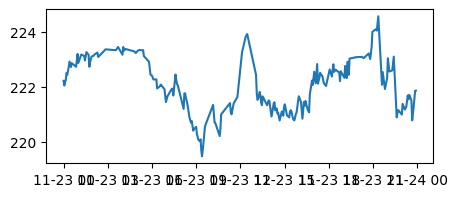

In [12]:
#做圖練習

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Ex4.csv')

df['index_date'] = pd.to_datetime(df['index_date'].astype(str))
#化整
df['index_date'] = df['index_date'].dt.floor('1T')
df = df.set_index('index_date')
df = df.sort_index() #依照index排序資料

df.fillna({'powerprobe_no':4,'VOL':0,'AMP':0,'KW':0})
df = df.interpolate(method='linear')

plt.figure(figsize=(5,2))
plt.plot(df.index,df.VOL)
#plt.plot(df.index,df.AMP)
#plt.plot(df.index,df.KW)
plt.show()